## 正規分布とその応用
所持しているデータが正規分布であると仮定すると、シミュレーションをすることなく計算を行うだけで様々なことがわかります。
このファイルでは、正規分布の性質とその計算、Pythonのライブラリの使い方の復習を行います。

In [13]:
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

### 確率密度
連続型確率変数の場合には確率変数がある一点の値をとる確率は0になることから、縦軸は確率ではなく「確率密度」というものを使います。確率密度は定義域内でのXの値の「相対的な出やすさ」を表すものです。

In [14]:
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2*sp.pi*sigma**2))*sp.exp(- ((x-mu)**2) / (2 * sigma**2))

0.228

確率密度はscipyの関数を使って以下のようにも表すことができます。

In [15]:
# loc = 平均 scale = 標準偏差 x=確率変数
stats.norm.pdf(loc = 4, scale = 0.8, x= 3)

0.228

確率密度を図示するには以下のように実装していきます

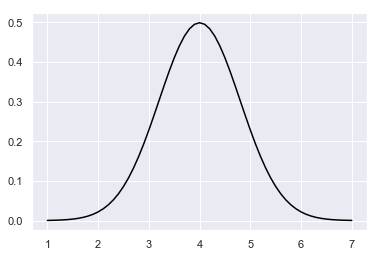

In [16]:
x_plot = np.arange(start = 1,stop = 7.1, step = 0.1)
plt.plot(x_plot,stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = 'black'
        )

### 累積分布関数
ある確率変数に対して、xを実数とする時以下のように表せるF(X)を累積分布関数あるいは分布関数と言います。
F(X) = P(X<=x)

平たくいうと、ある値以下となる確率を計算してくれるものです。

In [19]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

正規分布は平均に対して左右対称なので、データが平均値以下になる確率は50%になります

In [20]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

累積分布関数で求められる値を下側確率と呼ぶ

### パーセント点
同母集団で下側確率が2.5%となるパーセント点は以下のようにして求める事ができます

In [21]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

下側確率が50%となるパーセント点は平均に一致

### t値
t値は以下のように計算される統計量です。
t値 = (標本平均 - 母平均) / 標準誤差
標準誤差は、標本平均の標準偏差とみなすことが出来ます。つまりt値というのは、標本平均に対する標準化と言えそうです。

### t値の標本分布
ここでは以下のようにして、t値の標本分布をシミュレーションします。

1. 母集団分布がN(x | 4,0.8**2)である母集団から、標本抽出シミュレーションを行う(サンプルサイズ = 10)
1. 得られた標本から標本平均を求める
1. 得られた標本から標準誤差を求める
1. (標本平均 - 母平均) / 標準誤差 という計算によりt値を計算
1. この試行を10000回繰り返す

In [22]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)

# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)
# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

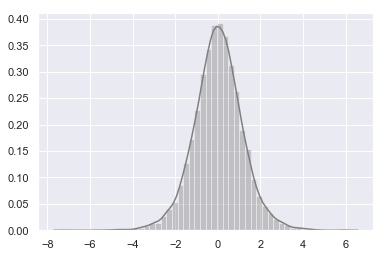

In [23]:
# t値のヒストグラム
sns.distplot(t_value_array, color = 'gray')

t分布の平均値は0です。
t分布の分散は1よりも少し大きくなります。
自由度をnとして計算すると、t分布の分散は以下のようになります。

t(n)の分散 = n / n-2